### Import Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Data Acquisition

In [2]:
from pyxlsb import open_workbook

df=[]
with open_workbook('/Users/pawanp29/Downloads/Worksheet in Analysis Case Study (1).xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df1 = pd.DataFrame(df[1:], columns=df[0])

### EDA

In [3]:
df1['Service Sub Type'].value_counts()

catalog                     55739
User Service Restoration    54578
How Do I                    36278
Name: Service Sub Type, dtype: int64

In [4]:
df1.groupby(by='Status Class')['TTR_Hours'].mean()

Status Class
Cancelled    173.207824
Closed        53.033305
Name: TTR_Hours, dtype: float64

Comparison of Different CSAT rating on scale of Mean TTR_Hours

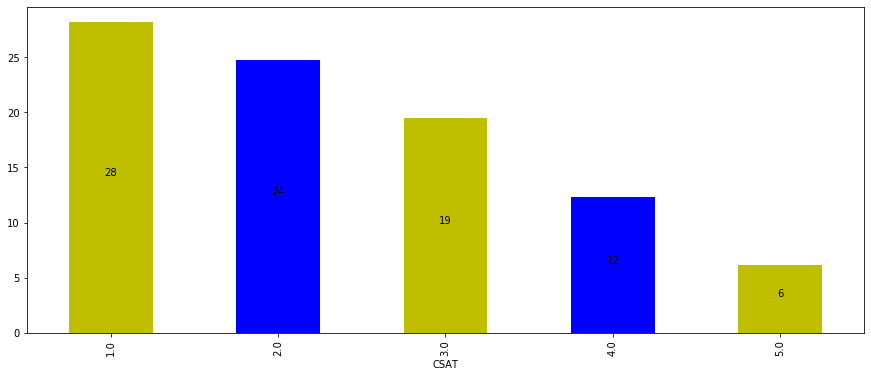

In [5]:
from itertools import cycle, islice

my_colors = ['y', 'b']*5
ax = df1.groupby(by='CSAT')['TTR_Hours'].mean().plot.bar(figsize=(15,6),color=my_colors)
for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')

Comparison of Different Status Class on scale of Mean TTR_Hours

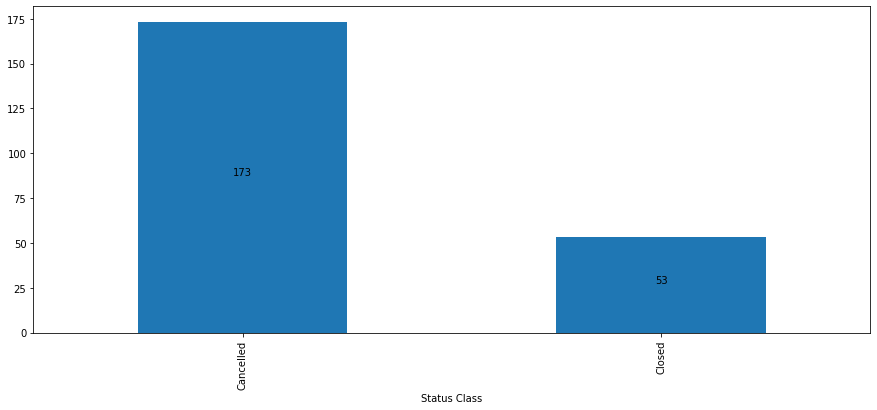

In [6]:
ax= df1.groupby(by='Status Class')['TTR_Hours'].mean().plot.bar(figsize=(15,6))
for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')

Comparison of Different Geographical Locations on scale of Mean TTR_Hours

In [8]:
df1.groupby(by='Country Name')['TTR_Hours'].mean()

Country Name
Argentina          72.904188
Australia         144.208611
Austria           155.762441
Belgium            84.802569
Brazil              3.480000
Canada             62.382735
China              51.768563
Costa Rica        182.040765
Czechia            84.350833
Denmark            19.458000
Egypt             134.917438
Finland           354.788577
France             66.559444
Germany           162.345247
India              66.388171
Ireland           107.449511
Israel             94.045402
Italy              78.817475
Japan              57.745605
Latvia             73.491722
Malaysia           67.087095
Mexico            114.106072
Netherlands       145.301022
Panama             24.996388
Peru                0.909166
Poland            100.985399
Portugal           84.466388
Romania            77.381524
Russian Fed        48.093084
Serbia              0.164444
Singapore          59.721966
South Africa      663.180138
South Korea       162.905928
Spain             158.803888
S

Comparison of Different Region Code on scale of Mean TTR_Hours

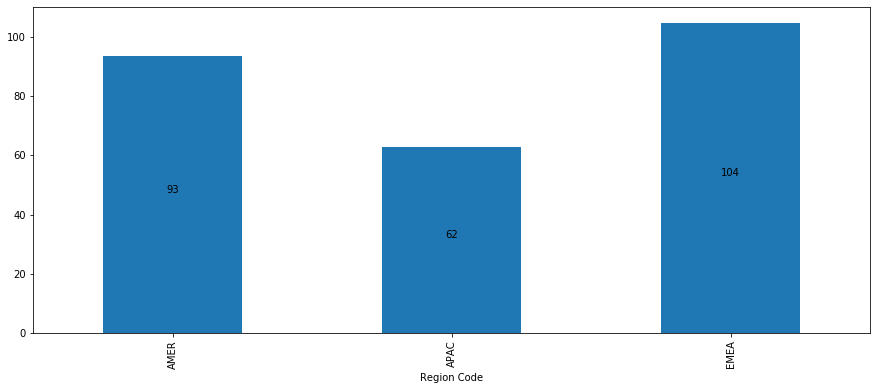

In [9]:
ax= df1.groupby(by='Region Code')['TTR_Hours'].mean().plot.bar(figsize=(15,6))
for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')

#### Features with Null Value %

In [13]:
a = df1.isna().sum()*100/len(df1)

a.sort_values(ascending=True)

Ticket Number                        0.000000
Reopened E2E                         0.000000
Reopened                             0.000000
TAC Resolved                         0.000000
Contact Type                         0.000000
TTR Less Than or Equal to 90 min     0.000000
TTR Less Than or Equal to 30 min     0.000000
Escalated Flag                       0.000000
Priority                             0.000000
Service Sub Type                     0.000000
TTR_Hours                            0.000000
Short Description                    0.000000
Status Class                         0.000000
Resolved Agent Team                  0.000000
TTR Less Than or Equal to 1 hr       0.000000
Day                                  0.000000
Week                                 0.000000
Resolved Agent Service Desk          0.000000
Year                                 0.000000
Month                                0.000000
Created Calendar Date                0.000000
Submit Date                       

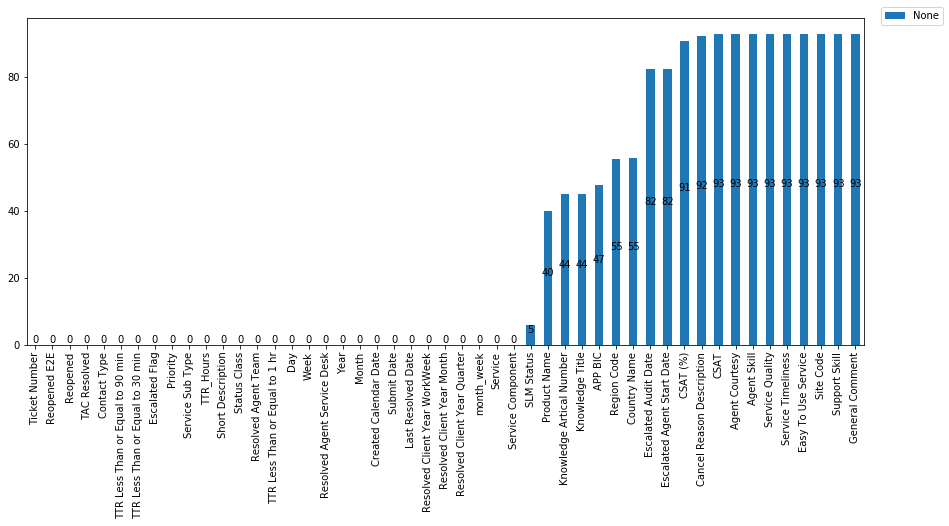

In [10]:
# Null Values' Data
a = df1.isna().sum()*100/len(df1)

ax = a.sort_values(ascending=True).plot.bar(figsize=(15,6))
ax.legend(bbox_to_anchor=(1.1, 1.05))

for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')

In [11]:
df1.head()

,Ticket Number,Created Calendar Date,Submit Date,Month,Week,Year,Day,month_week,Last Resolved Date,Resolved Client Year WorkWeek,...,TTR Less Than or Equal to 30 min,CSAT,Agent Courtesy,Agent Skill,Service Quality,Service Timeliness,Easy To Use Service,Site Code,Support Skill,General Comment
0,INC010429794,43827.0,43827.702940,12. Dec,53.0,2019.0,Sun,5.0,43828.017870,202001.0,...,No,NaN,None,None,None,None,None,None,None,None
1,INC010430302,43828.0,43828.021285,12. Dec,53.0,2019.0,Sun,5.0,43828.031262,202001.0,...,No,NaN,None,None,None,None,None,None,None,None
2,RITM8217581,43828.0,43828.036933,12. Dec,53.0,2019.0,Sun,5.0,43828.039074,202001.0,...,Yes,NaN,None,None,None,None,None,None,None,None
3,RITM8217584,43828.0,43828.038588,12. Dec,53.0,2019.0,Sun,5.0,43828.044954,202001.0,...,Yes,NaN,None,None,None,None,None,None,None,None
4,INC010428398,43826.0,43826.978426,12. Dec,53.0,2019.0,Sun,5.0,43828.053681,202001.0,...,No,NaN,None,None,None,None,None,None,None,None


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146595 entries, 0 to 146594
Data columns (total 49 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Ticket Number                     146595 non-null  object 
 1   Created Calendar Date             146595 non-null  float64
 2   Submit Date                       146595 non-null  float64
 3   Month                             146595 non-null  object 
 4   Week                              146595 non-null  float64
 5   Year                              146595 non-null  float64
 6   Day                               146595 non-null  object 
 7   month_week                        146595 non-null  float64
 8   Last Resolved Date                146595 non-null  float64
 9   Resolved Client Year WorkWeek     146595 non-null  float64
 10  Resolved Client Year Month        146595 non-null  float64
 11  Resolved Client Year Quarter      146595 non-null  f

In [14]:
print('Average Handling Time (AHT)',df1['TTR_Hours'].mean())

Average Handling Time (AHT) 69.26725601493308


Volume of Each Month

In [15]:
df1['Month'].value_counts()

01. Jan    38390
03. Mar    37529
04. Apr    33933
02. Feb    32996
12. Dec     2736
05. May     1011
Name: Month, dtype: int64

In [16]:
df1.groupby(['Status Class','Priority'])['TTR_Hours'].count()

Status Class  Priority    
Cancelled     1 - Critical       241
              2 - High           167
              3 - Moderate       991
              4 - Low          18404
Closed        1 - Critical       656
              2 - High           444
              3 - Moderate      3647
              4 - Low         122045
Name: TTR_Hours, dtype: int64

In [17]:
df1['TTR_Hours'].describe()

count    146595.000000
mean         69.267256
std         448.439792
min         -16.700277
25%           0.300555
50%           0.961944
75%          15.845833
max       16765.861388
Name: TTR_Hours, dtype: float64

Comparison of Different Months on scale of Mean TTR_Hours

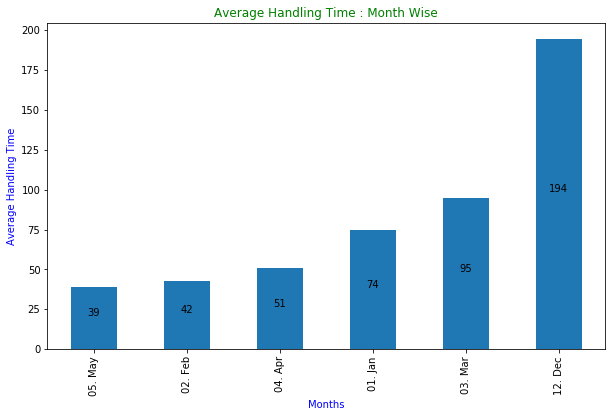

In [18]:
ax = df1.groupby(by = 'Month')['TTR_Hours'].mean().sort_values(ascending=True).plot.bar(figsize=(10,6))
plt.title('Average Handling Time : Month Wise',color = 'green')
plt.xlabel('Months',color = 'blue')
plt.ylabel('Average Handling Time',color = 'blue')
plt.xticks(color = 'black')
plt.yticks(color = 'black')

for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')
    
plt.show()

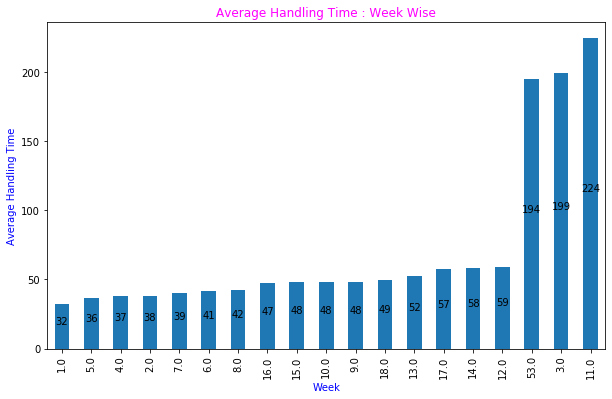

In [19]:
ax = df1.groupby(by = 'Week')['TTR_Hours'].mean().sort_values(ascending=True).plot.bar(figsize=(10,6))
plt.title('Average Handling Time : Week Wise',color = 'magenta')
plt.xlabel('Week',color = 'blue')
plt.ylabel('Average Handling Time',color = 'blue')
plt.xticks(color = 'black')
plt.yticks(color = 'black')

for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')
    
plt.show()

Comparison of Different Days on scale of Mean TTR_Hours

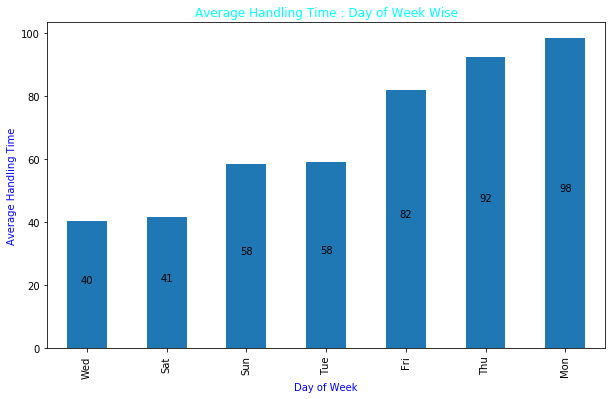

In [20]:
ax = df1.groupby(by = 'Day')['TTR_Hours'].mean().sort_values(ascending=True).plot.bar(figsize=(10,6))
plt.title('Average Handling Time : Day of Week Wise',color = 'cyan')
plt.xlabel('Day of Week',color = 'blue')
plt.ylabel('Average Handling Time',color = 'blue')
plt.xticks(color = 'black')
plt.yticks(color = 'black')

for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')
    
plt.show()

Observation -
As compared to AHT of 69.26 
- only three months - Feb, April & May are below average while other three are above average with December being distingushly higher
- only 3 weeks out of 19 are above average
- 3 days of week are above AHT

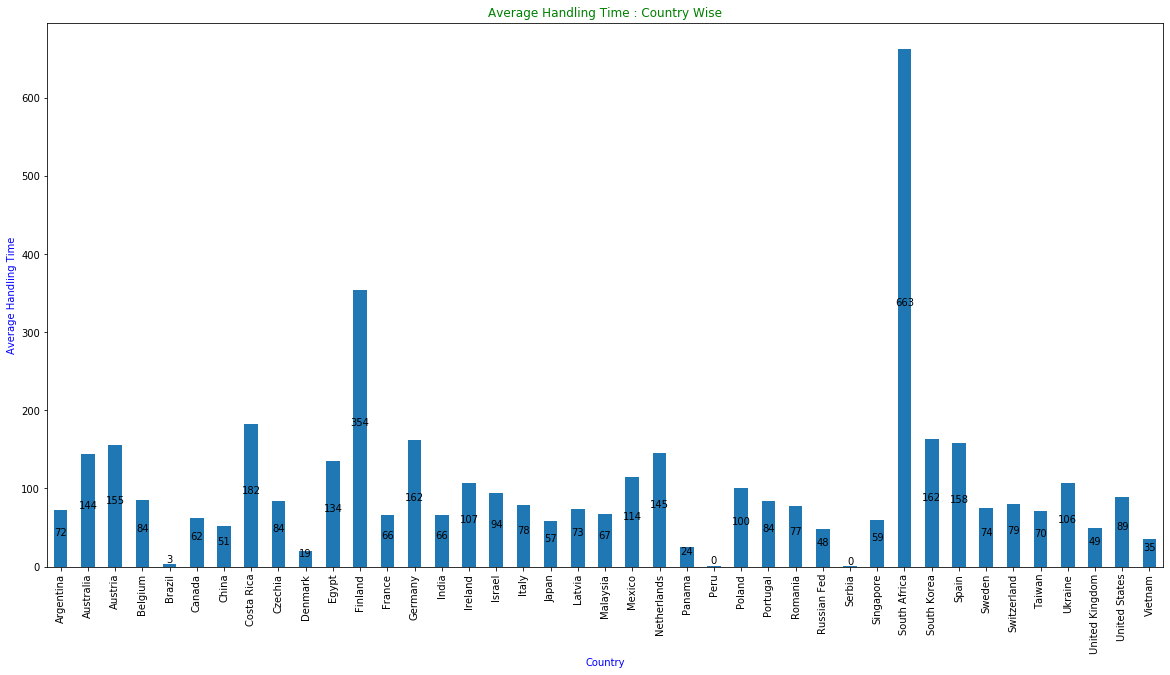

In [21]:
ax = df1.groupby(by = 'Country Name')['TTR_Hours'].mean().plot.bar(figsize=(20,10))
plt.title('Average Handling Time : Country Wise',color = 'green')
plt.xlabel('Country',color = 'blue')
plt.ylabel('Average Handling Time',color = 'blue')
plt.xticks(color = 'black')
plt.yticks(color = 'black')

for rect in ax.patches:
    height = rect.get_height()
    ypos   = rect.get_y() + height/2
    ax.text(rect.get_x() + rect.get_width()/2., ypos,'%d' % int(height), ha='center', va='bottom')
    
plt.show()

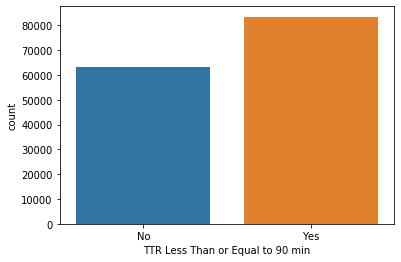

In [22]:
sns.countplot(x='TTR Less Than or Equal to 90 min',data=df1)

### Data Visualisation

In [23]:
df1['Country Name'].unique()

array(['United States', None, 'China', 'India', 'Malaysia', 'Israel',
       'Vietnam', 'Poland', 'Russian Fed', 'Ireland', 'South Korea',
       'United Kingdom', 'Romania', 'Taiwan', 'Austria', 'Germany',
       'Singapore', 'Costa Rica', 'Mexico', 'Canada', 'Japan',
       'Argentina', 'Finland', 'Netherlands', 'France', 'Latvia',
       'Sweden', 'Switzerland', 'Italy', 'South Africa', 'Egypt',
       'Czechia', 'Portugal', 'Spain', 'Denmark', 'Belgium', 'Ukraine',
       'Peru', 'Brazil', 'Serbia', 'Australia', 'Panama'], dtype=object)

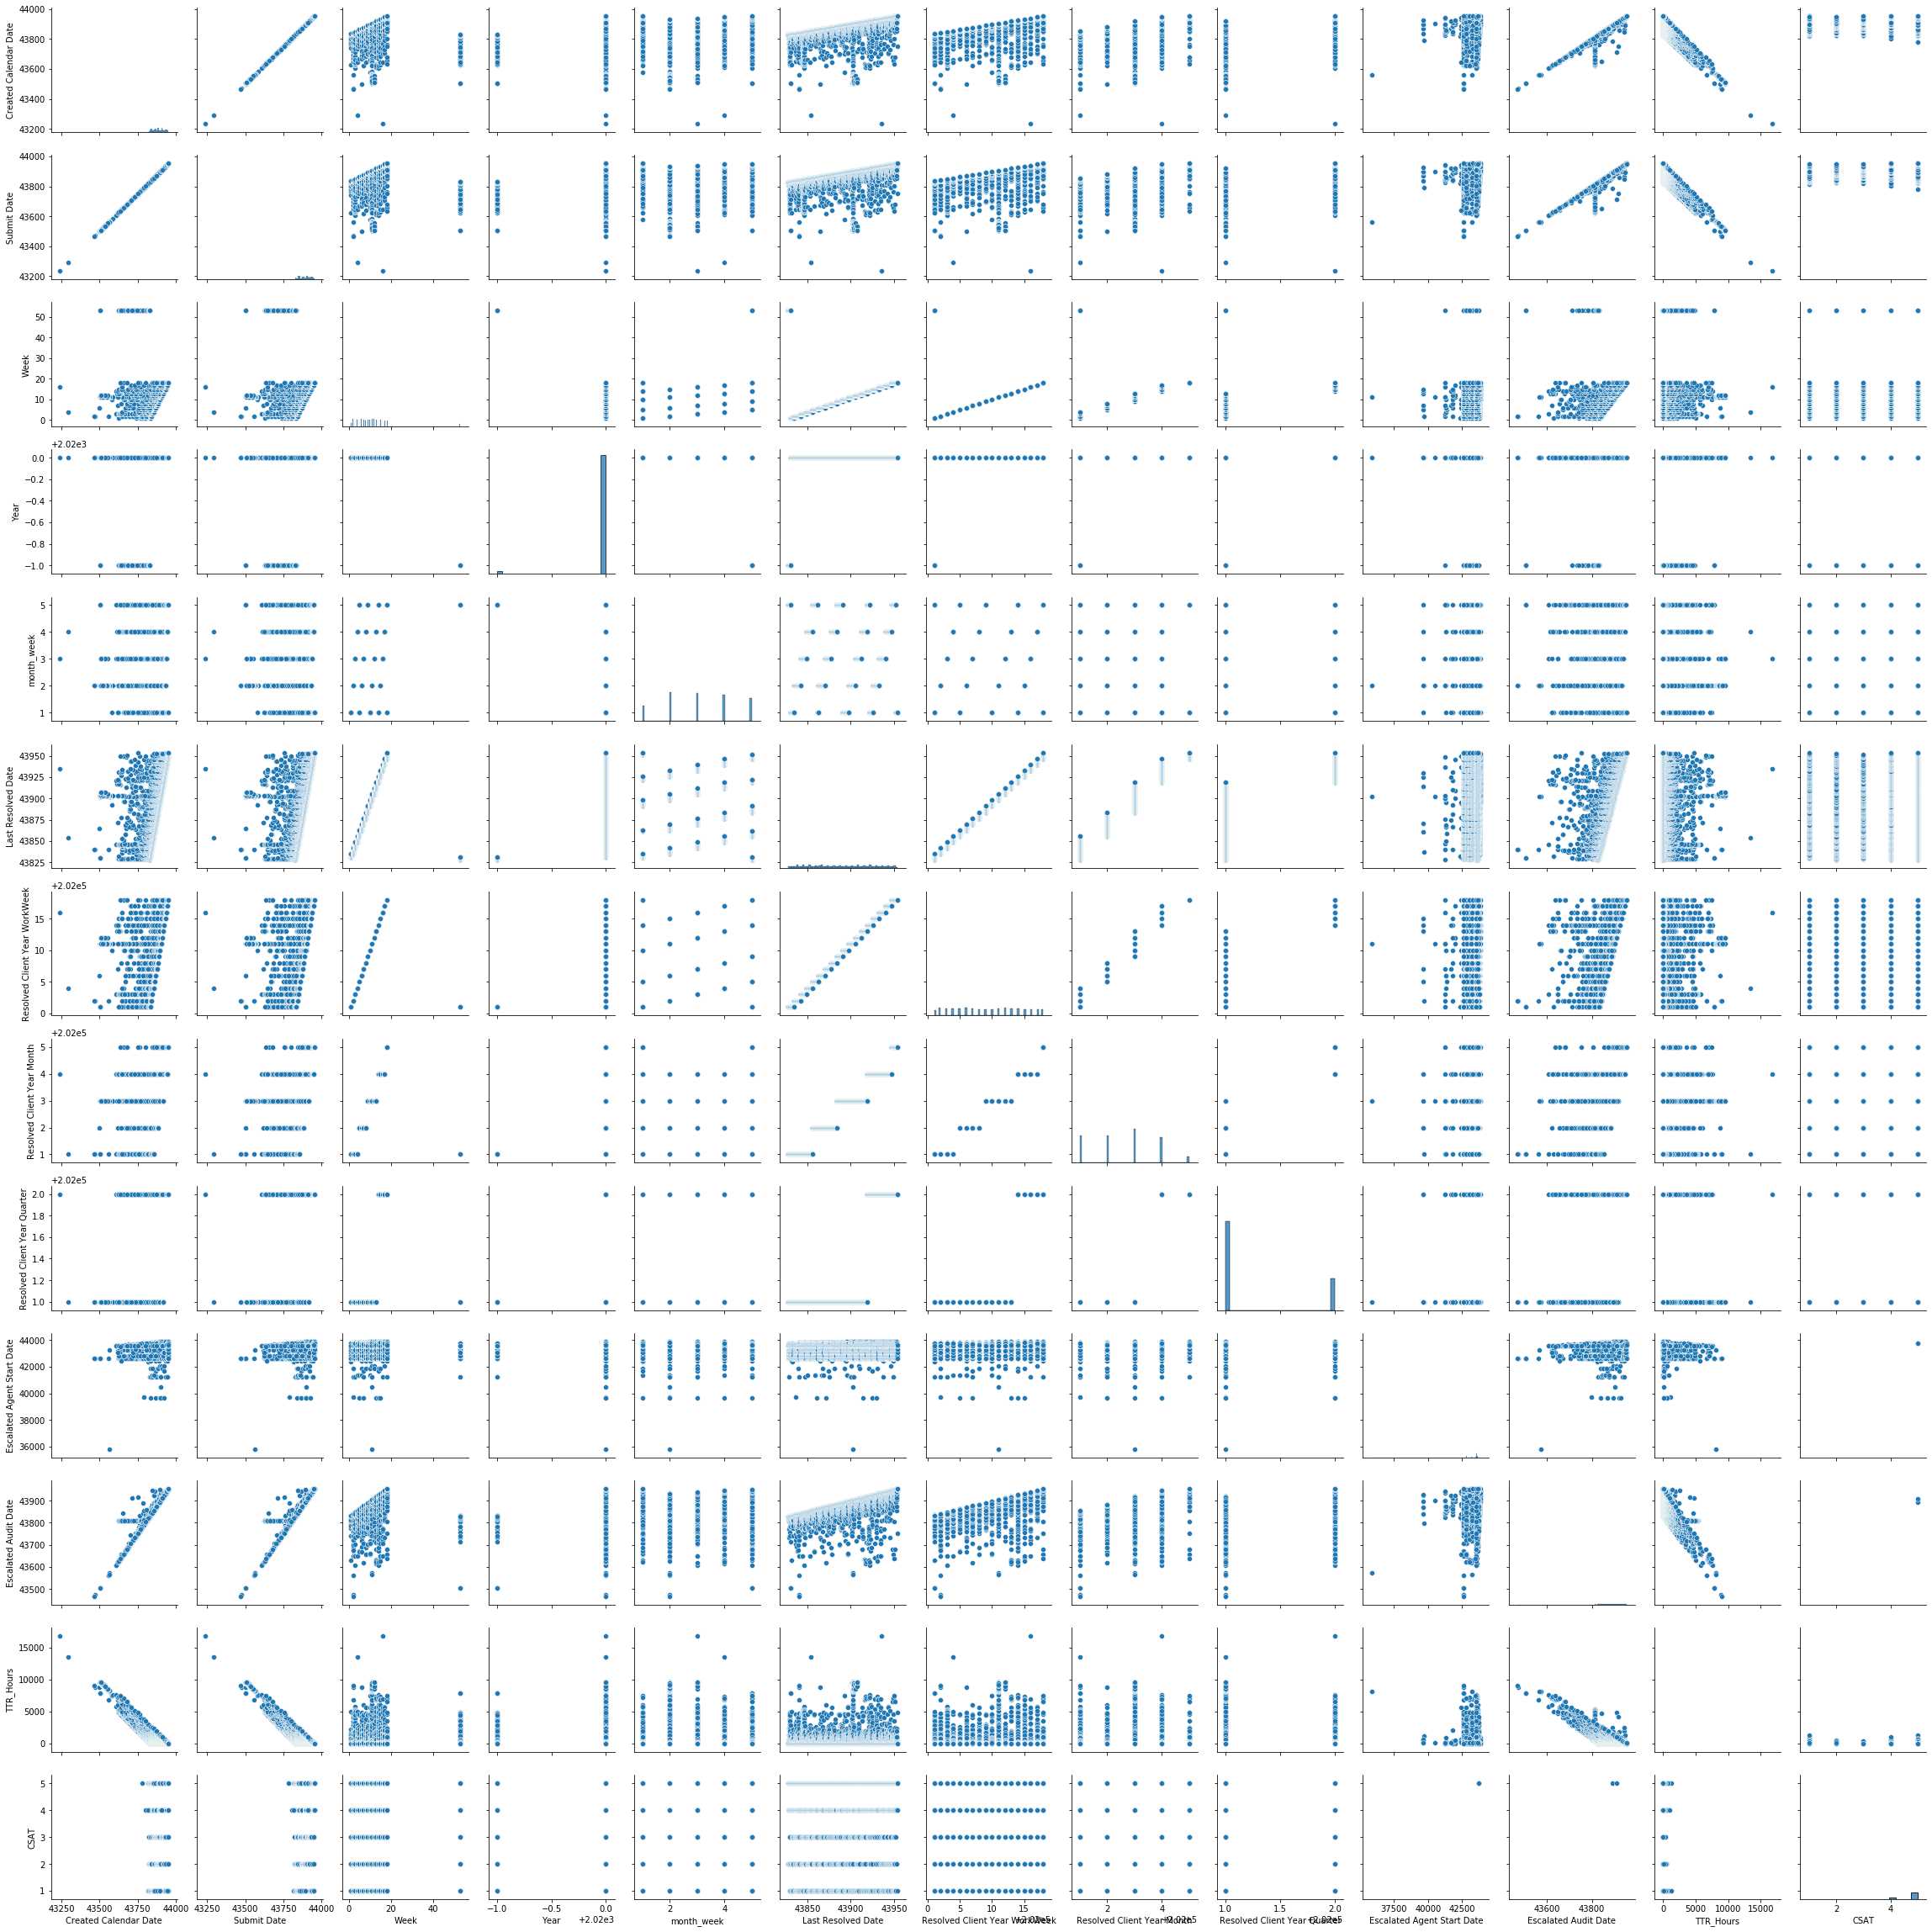

In [25]:
sns.pairplot(df1)

### Feature Engineering

In [27]:
df2 = df1.drop(['Created Calendar Date','Submit Date','Escalated Agent Start Date','APP BIC','Last Resolved Date',
                'Escalated Audit Date','Escalated Agent Start Date','Short Description',
                'Cancel Reason Description', 'CSAT (%)', 'Knowledge Artical Number','Knowledge Title', 'Product Name',
                'Country Name','Region Code','CSAT', 'Agent Courtesy','Agent Skill', 'Service Quality', 
                'Service Timeliness','Easy To Use Service', 'Site Code', 'Support Skill', 'General Comment'],axis=1)

In [28]:
df2.loc[df2['Service'].isna(), 'Service'] = 'Misc'

df2.loc[df2['Service Component'].isna(), 'Service Component'] = 'Misc'

df2.loc[df2['SLM Status'].isna(), 'SLM Status'] = 'Misc'

# Import Library from Label Enncoding
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

df2['Day']   = labelencoder.fit_transform(df2['Day'])

df2['Resolved Client Year WorkWeek'] = labelencoder.fit_transform(df2['Resolved Client Year WorkWeek'])

df2['Resolved Client Year Month']    = labelencoder.fit_transform(df2['Resolved Client Year Month'])

df2['Resolved Client Year Quarter']  = labelencoder.fit_transform(df2['Resolved Client Year Quarter'])

df2['Resolved Agent Service Desk']   = labelencoder.fit_transform(df2['Resolved Agent Service Desk'])

df2['Resolved Agent Team']           = labelencoder.fit_transform(df2['Resolved Agent Team'])
 
df2['Status Class']                  = labelencoder.fit_transform(df2['Status Class'])
 
df2['SLM Status']                    = labelencoder.fit_transform(df2['SLM Status'])
 
df2['Service Sub Type']              = labelencoder.fit_transform(df2['Service Sub Type'])

df2['Priority']                      = labelencoder.fit_transform(df2['Priority'])
 
df2['Escalated Flag']                = labelencoder.fit_transform(df2['Escalated Flag'])
 
df2['Service']                       = labelencoder.fit_transform(df2['Service'])
 
df2['Service Component']             = labelencoder.fit_transform(df2['Service Component'])
 
df2['Contact Type']                  = labelencoder.fit_transform(df2['Contact Type'])

df2['TAC Resolved']                  = labelencoder.fit_transform(df2['TAC Resolved'])
 
df2['Reopened']                      = labelencoder.fit_transform(df2['Reopened'])

df2['Reopened E2E']                  = labelencoder.fit_transform(df2['Reopened E2E'])
 
df2['TTR Less Than or Equal to 1 hr']   = labelencoder.fit_transform(df2['TTR Less Than or Equal to 1 hr'])
 
df2['TTR Less Than or Equal to 90 min'] = labelencoder.fit_transform(df2['TTR Less Than or Equal to 90 min'])

df2['TTR Less Than or Equal to 30 min'] = labelencoder.fit_transform(df2['TTR Less Than or Equal to 30 min'])

In [29]:
df2.loc[df2['Month'] == '01. Jan','Month_Updated'] = 1
df2.loc[df2['Month'] == '03. Mar','Month_Updated'] = 3
df2.loc[df2['Month'] == '04. Apr','Month_Updated'] = 4
df2.loc[df2['Month'] == '02. Feb','Month_Updated'] = 2
df2.loc[df2['Month'] == '05. May','Month_Updated'] = 5
df2.loc[df2['Month'] == '12. Dec','Month_Updated'] = 12

df2['Month_Updated'] = pd.to_numeric(df2['Month_Updated'])

df2.drop(['Ticket Number','Month'],axis=1,inplace=True)

Correlation

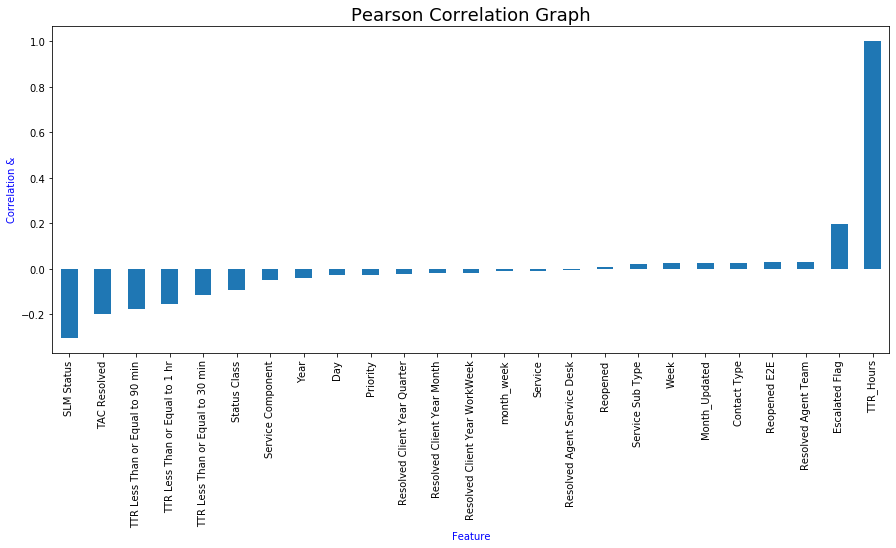

In [30]:
plt.figure(figsize=(15,6))
title = 'Pearson Correlation Graph'
plt.title(title, loc='center', fontsize=18)
df2.corr()['TTR_Hours'].sort_values(ascending=True).plot(kind='bar')
plt.xlabel('Feature',color = 'blue')
plt.ylabel('Correlation &',color = 'blue')
plt.xticks(color = 'black')
plt.yticks(color = 'black')

plt.show()

Outlier Detection

In [31]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

df2_IQR = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f'Dimensions of Initial Dataframe                                            -  {df2.shape}')
print(f'Dimensions of Dataframe after removal of Outliers                          -  {df2_IQR.shape}')

Dimensions of Initial Dataframe                                            -  (146595, 25)
Dimensions of Dataframe after removal of Outliers                          -  (55986, 25)


### Model Build

Linear: -2.763, 0.069
Lasso: -3.113, 0.08
Ridge: -2.762, 0.069
ElasticNet: -3.229, 0.081
DecisionTree: -2.158, 0.072
KNN: -2.284, 0.063
RandomForest: -2.113, 0.07
AdaBoost: -2.957, 0.095
GradientBoost: -2.373, 0.081
[12:21:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:21:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:22:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in

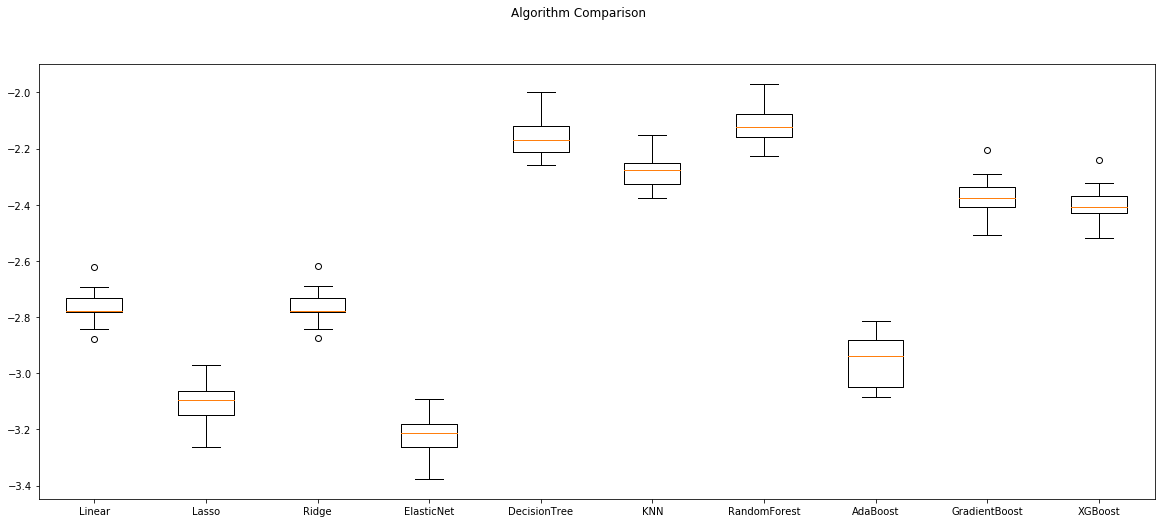

In [32]:
from sklearn.linear_model    import LinearRegression
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.tree            import DecisionTreeRegressor
from sklearn.linear_model    import Lasso
from sklearn.linear_model    import Ridge
from sklearn.linear_model    import ElasticNet
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.ensemble        import AdaBoostRegressor
from xgboost                 import XGBRFRegressor
from sklearn.svm             import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Train Test Split
X = df2_IQR.drop(['TTR_Hours'],axis=1)
y = df2_IQR['TTR_Hours']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define User Variables
metric  = "neg_mean_absolute_error"

# Encapsulate different regression models in a dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["XGBoost"]       = XGBRFRegressor() 

# Apply 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# Plot a graph to compare CV Score of models
fig = plt.figure(figsize = (20,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(model_names)
plt.show()

In [33]:
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor()
# Prepare the model
rf.fit(X_train,y_train)
# Predict using Model
predictions_rf=rf.predict(X_test)

print('--- Evalutaion Matrix of Random Forest Model ---')
print('Mean Absolute Error      - ', metrics.mean_absolute_error(y_test,predictions_rf))
print('Mean Squared Error       - ', metrics.mean_squared_error(y_test,predictions_rf))
print('Root Mean Squared Error  - ' ,np.sqrt(metrics.mean_squared_error(y_test,predictions_rf))) 

--- Evalutaion Matrix of Random Forest Model ---
Mean Absolute Error      -  2.047458459407885
Mean Squared Error       -  21.64923292586687
Root Mean Squared Error  -  4.652873620233723


### Artificial Nueral Network

In [34]:
import tensorflow as tf
from tensorflow.keras.callbacks             import ModelCheckpoint
from tensorflow.keras.models                import Sequential
from tensorflow.keras.layers                import Dense, Activation,Dropout,Flatten
from tensorflow.keras.constraints           import max_norm
from tensorflow.keras.callbacks             import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics                        import mean_absolute_error

In [35]:
# Train Test Split
X = df2_IQR.drop(['TTR_Hours'],axis=1)
y = df2_IQR['TTR_Hours']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 168,065
Trainable params: 168,065
Non-tra

In [36]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [37]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 35830 samples, validate on 8958 samples
Epoch 1/500
34976/35830 [============================>.] - ETA: 0s - loss: 2.9566 - mean_absolute_error: 2.9566
Epoch 00001: val_loss improved from inf to 2.93248, saving model to Weights-001--2.93248.hdf5
35830/35830 [==============================] - 2s 67us/sample - loss: 2.9629 - mean_absolute_error: 2.9629 - val_loss: 2.9325 - val_mean_absolute_error: 2.9325
Epoch 2/500
35744/35830 [============================>.] - ETA: 0s - loss: 2.5017 - mean_absolute_error: 2.5017
Epoch 00002: val_loss improved from 2.93248 to 2.25342, saving model to Weights-002--2.25342.hdf5
35830/35830 [==============================] - 2s 69us/sample - loss: 2.5018 - mean_absolute_error: 2.5018 - val_loss: 2.2534 - val_mean_absolute_error: 2.2534
Epoch 3/500
35456/35830 [============================>.] - ETA: 0s - loss: 2.3081 - mean_absolute_error: 2.3081
Epoch 00003: val_loss did not improve from 2.25342
35830/35830 [==============================] - 2s 69

Epoch 25/500
34944/35830 [============================>.] - ETA: 0s - loss: 2.1737 - mean_absolute_error: 2.1737- ETA: 0s - loss: 2.2029 - mean_absolute_err
Epoch 00025: val_loss improved from 2.13413 to 2.13203, saving model to Weights-025--2.13203.hdf5
35830/35830 [==============================] - 2s 67us/sample - loss: 2.1643 - mean_absolute_error: 2.1643 - val_loss: 2.1320 - val_mean_absolute_error: 2.1320
Epoch 26/500
35712/35830 [============================>.] - ETA: 0s - loss: 2.1558 - mean_absolute_error: 2.1558
Epoch 00026: val_loss did not improve from 2.13203
35830/35830 [==============================] - 2s 62us/sample - loss: 2.1547 - mean_absolute_error: 2.1547 - val_loss: 2.1498 - val_mean_absolute_error: 2.1498
Epoch 27/500
35232/35830 [============================>.] - ETA: 0s - loss: 2.1585 - mean_absolute_error: 2.1585
Epoch 00027: val_loss did not improve from 2.13203
35830/35830 [==============================] - 2s 63us/sample - loss: 2.1640 - mean_absolute_erro

Epoch 74/500
34912/35830 [============================>.] - ETA: 0s - loss: 2.1167 - mean_absolute_error: 2.1167
Epoch 00074: val_loss did not improve from 2.10541
35830/35830 [==============================] - 2s 62us/sample - loss: 2.1187 - mean_absolute_error: 2.1187 - val_loss: 2.1093 - val_mean_absolute_error: 2.1093
Epoch 75/500
35328/35830 [============================>.] - ETA: 0s - loss: 2.1146 - mean_absolute_error: 2.1146- ETA: 1s - loss: 2.14
Epoch 00075: val_loss improved from 2.10541 to 2.09716, saving model to Weights-075--2.09716.hdf5
35830/35830 [==============================] - 2s 62us/sample - loss: 2.1122 - mean_absolute_error: 2.1122 - val_loss: 2.0972 - val_mean_absolute_error: 2.0972
Epoch 76/500
35744/35830 [============================>.] - ETA: 0s - loss: 2.1183 - mean_absolute_error: 2.1183
Epoch 00076: val_loss did not improve from 2.09716
35830/35830 [==============================] - 2s 62us/sample - loss: 2.1210 - mean_absolute_error: 2.1210 - val_loss: 

Epoch 99/500
35616/35830 [============================>.] - ETA: 0s - loss: 2.2063 - mean_absolute_error: 2.2063
Epoch 00099: val_loss did not improve from 2.09311
35830/35830 [==============================] - 2s 60us/sample - loss: 2.2033 - mean_absolute_error: 2.2033 - val_loss: 2.1881 - val_mean_absolute_error: 2.1881
Epoch 100/500
35456/35830 [============================>.] - ETA: 0s - loss: 2.1940 - mean_absolute_error: 2.1940
Epoch 00100: val_loss did not improve from 2.09311
35830/35830 [==============================] - 3s 71us/sample - loss: 2.1948 - mean_absolute_error: 2.1948 - val_loss: 2.1821 - val_mean_absolute_error: 2.1821
Epoch 101/500
35552/35830 [============================>.] - ETA: 0s - loss: 2.1890 - mean_absolute_error: 2.1890
Epoch 00101: val_loss did not improve from 2.09311
35830/35830 [==============================] - 2s 62us/sample - loss: 2.1915 - mean_absolute_error: 2.1915 - val_loss: 2.1792 - val_mean_absolute_error: 2.1792
Epoch 102/500
35296/35830 

Epoch 124/500
35424/35830 [============================>.] - ETA: 0s - loss: 2.1674 - mean_absolute_error: 2.1674
Epoch 00124: val_loss did not improve from 2.09311
35830/35830 [==============================] - 2s 61us/sample - loss: 2.1680 - mean_absolute_error: 2.1680 - val_loss: 2.1537 - val_mean_absolute_error: 2.1537
Epoch 125/500
35488/35830 [============================>.] - ETA: 0s - loss: 2.1637 - mean_absolute_error: 2.1637
Epoch 00125: val_loss did not improve from 2.09311
35830/35830 [==============================] - 2s 60us/sample - loss: 2.1670 - mean_absolute_error: 2.1670 - val_loss: 2.1488 - val_mean_absolute_error: 2.1488
Epoch 126/500
34944/35830 [============================>.] - ETA: 0s - loss: 2.1590 - mean_absolute_error: 2.1590
Epoch 00126: val_loss did not improve from 2.09311
35830/35830 [==============================] - 2s 63us/sample - loss: 2.1538 - mean_absolute_error: 2.1538 - val_loss: 2.1490 - val_mean_absolute_error: 2.1490
Epoch 127/500
35296/35830

Epoch 174/500
35488/35830 [============================>.] - ETA: 0s - loss: 2.1125 - mean_absolute_error: 2.1125
Epoch 00174: val_loss did not improve from 2.08990
35830/35830 [==============================] - 3s 78us/sample - loss: 2.1146 - mean_absolute_error: 2.1146 - val_loss: 2.1255 - val_mean_absolute_error: 2.1255
Epoch 175/500
35136/35830 [============================>.] - ETA: 0s - loss: 2.1146 - mean_absolute_error: 2.1146
Epoch 00175: val_loss did not improve from 2.08990
35830/35830 [==============================] - 2s 58us/sample - loss: 2.1148 - mean_absolute_error: 2.1148 - val_loss: 2.0997 - val_mean_absolute_error: 2.0997
Epoch 176/500
35808/35830 [============================>.] - ETA: 0s - loss: 2.1097 - mean_absolute_error: 2.1097
Epoch 00176: val_loss did not improve from 2.08990
35830/35830 [==============================] - 2s 62us/sample - loss: 2.1097 - mean_absolute_error: 2.1097 - val_loss: 2.0901 - val_mean_absolute_error: 2.0901
Epoch 177/500
35200/35830

Epoch 199/500
35264/35830 [============================>.] - ETA: 0s - loss: 2.1041 - mean_absolute_error: 2.1041
Epoch 00199: val_loss did not improve from 2.08631
35830/35830 [==============================] - 2s 58us/sample - loss: 2.1020 - mean_absolute_error: 2.1020 - val_loss: 2.1048 - val_mean_absolute_error: 2.1048
Epoch 200/500
35456/35830 [============================>.] - ETA: 0s - loss: 2.1047 - mean_absolute_error: 2.1047- ETA: 1s - loss: 2.095
Epoch 00200: val_loss did not improve from 2.08631
35830/35830 [==============================] - 2s 68us/sample - loss: 2.1047 - mean_absolute_error: 2.1047 - val_loss: 2.1159 - val_mean_absolute_error: 2.1159
Epoch 201/500
35200/35830 [============================>.] - ETA: 0s - loss: 2.1218 - mean_absolute_error: 2.1218
Epoch 00201: val_loss did not improve from 2.08631
35830/35830 [==============================] - 2s 56us/sample - loss: 2.1169 - mean_absolute_error: 2.1169 - val_loss: 2.0916 - val_mean_absolute_error: 2.0916
Ep

Epoch 224/500
35520/35830 [============================>.] - ETA: 0s - loss: 2.1018 - mean_absolute_error: 2.1018
Epoch 00224: val_loss did not improve from 2.08452
35830/35830 [==============================] - 2s 69us/sample - loss: 2.0977 - mean_absolute_error: 2.0977 - val_loss: 2.1243 - val_mean_absolute_error: 2.1243
Epoch 225/500
35520/35830 [============================>.] - ETA: 0s - loss: 2.1019 - mean_absolute_error: 2.1019
Epoch 00225: val_loss did not improve from 2.08452
35830/35830 [==============================] - 2s 65us/sample - loss: 2.1039 - mean_absolute_error: 2.1039 - val_loss: 2.0899 - val_mean_absolute_error: 2.0899
Epoch 226/500
35232/35830 [============================>.] - ETA: 0s - loss: 2.0980 - mean_absolute_error: 2.0980
Epoch 00226: val_loss did not improve from 2.08452
35830/35830 [==============================] - 3s 73us/sample - loss: 2.1004 - mean_absolute_error: 2.1004 - val_loss: 2.1401 - val_mean_absolute_error: 2.1401
Epoch 227/500
35328/35830

Epoch 249/500
35808/35830 [============================>.] - ETA: 0s - loss: 2.0943 - mean_absolute_error: 2.0943
Epoch 00249: val_loss did not improve from 2.08088
35830/35830 [==============================] - 2s 60us/sample - loss: 2.0944 - mean_absolute_error: 2.0944 - val_loss: 2.0845 - val_mean_absolute_error: 2.0845
Epoch 250/500
35520/35830 [============================>.] - ETA: 0s - loss: 2.1055 - mean_absolute_error: 2.1055
Epoch 00250: val_loss did not improve from 2.08088
35830/35830 [==============================] - 2s 60us/sample - loss: 2.1053 - mean_absolute_error: 2.1053 - val_loss: 2.1391 - val_mean_absolute_error: 2.1391
Epoch 251/500
35328/35830 [============================>.] - ETA: 0s - loss: 2.0954 - mean_absolute_error: 2.0954
Epoch 00251: val_loss did not improve from 2.08088
35830/35830 [==============================] - 2s 62us/sample - loss: 2.0962 - mean_absolute_error: 2.0962 - val_loss: 2.0896 - val_mean_absolute_error: 2.0896
Epoch 252/500
35744/35830

Epoch 299/500
35520/35830 [============================>.] - ETA: 0s - loss: 2.0936 - mean_absolute_error: 2.0936
Epoch 00299: val_loss did not improve from 2.08088
35830/35830 [==============================] - 2s 61us/sample - loss: 2.0991 - mean_absolute_error: 2.0991 - val_loss: 2.3834 - val_mean_absolute_error: 2.3834
Epoch 300/500
35072/35830 [============================>.] - ETA: 0s - loss: 2.1478 - mean_absolute_error: 2.1478
Epoch 00300: val_loss did not improve from 2.08088
35830/35830 [==============================] - 2s 61us/sample - loss: 2.1493 - mean_absolute_error: 2.1493 - val_loss: 2.1022 - val_mean_absolute_error: 2.1022
Epoch 301/500
35520/35830 [============================>.] - ETA: 0s - loss: 2.1096 - mean_absolute_error: 2.1096
Epoch 00301: val_loss did not improve from 2.08088
35830/35830 [==============================] - 2s 64us/sample - loss: 2.1090 - mean_absolute_error: 2.1090 - val_loss: 2.0990 - val_mean_absolute_error: 2.0990
Epoch 302/500
35712/35830

Epoch 324/500
35424/35830 [============================>.] - ETA: 0s - loss: 2.0754 - mean_absolute_error: 2.0754
Epoch 00324: val_loss did not improve from 2.05598
35830/35830 [==============================] - 2s 61us/sample - loss: 2.0750 - mean_absolute_error: 2.0750 - val_loss: 2.0930 - val_mean_absolute_error: 2.0930
Epoch 325/500
35488/35830 [============================>.] - ETA: 0s - loss: 2.0646 - mean_absolute_error: 2.0646
Epoch 00325: val_loss did not improve from 2.05598
35830/35830 [==============================] - 2s 65us/sample - loss: 2.0691 - mean_absolute_error: 2.0691 - val_loss: 2.0963 - val_mean_absolute_error: 2.0963
Epoch 326/500
35104/35830 [============================>.] - ETA: 0s - loss: 2.0684 - mean_absolute_error: 2.0684
Epoch 00326: val_loss improved from 2.05598 to 2.04205, saving model to Weights-326--2.04205.hdf5
35830/35830 [==============================] - 2s 62us/sample - loss: 2.0675 - mean_absolute_error: 2.0675 - val_loss: 2.0420 - val_mean_a

Epoch 349/500
35616/35830 [============================>.] - ETA: 0s - loss: 2.0588 - mean_absolute_error: 2.0588
Epoch 00349: val_loss improved from 2.03765 to 2.02724, saving model to Weights-349--2.02724.hdf5
35830/35830 [==============================] - 3s 82us/sample - loss: 2.0566 - mean_absolute_error: 2.0566 - val_loss: 2.0272 - val_mean_absolute_error: 2.0272
Epoch 350/500
34976/35830 [============================>.] - ETA: 0s - loss: 2.0520 - mean_absolute_error: 2.0520
Epoch 00350: val_loss did not improve from 2.02724
35830/35830 [==============================] - 3s 76us/sample - loss: 2.0594 - mean_absolute_error: 2.0594 - val_loss: 2.0474 - val_mean_absolute_error: 2.0474
Epoch 351/500
34976/35830 [============================>.] - ETA: 0s - loss: 2.0612 - mean_absolute_error: 2.0612
Epoch 00351: val_loss did not improve from 2.02724
35830/35830 [==============================] - 2s 62us/sample - loss: 2.0614 - mean_absolute_error: 2.0614 - val_loss: 2.1408 - val_mean_a

Epoch 374/500
35232/35830 [============================>.] - ETA: 0s - loss: 2.0894 - mean_absolute_error: 2.0894
Epoch 00374: val_loss did not improve from 2.01089
35830/35830 [==============================] - 2s 66us/sample - loss: 2.0886 - mean_absolute_error: 2.0886 - val_loss: 2.0677 - val_mean_absolute_error: 2.0677
Epoch 375/500
35296/35830 [============================>.] - ETA: 0s - loss: 2.0434 - mean_absolute_error: 2.0434
Epoch 00375: val_loss did not improve from 2.01089
35830/35830 [==============================] - 2s 63us/sample - loss: 2.0433 - mean_absolute_error: 2.0433 - val_loss: 2.0496 - val_mean_absolute_error: 2.0496
Epoch 376/500
35584/35830 [============================>.] - ETA: 0s - loss: 2.0455 - mean_absolute_error: 2.0455
Epoch 00376: val_loss did not improve from 2.01089
35830/35830 [==============================] - 2s 60us/sample - loss: 2.0406 - mean_absolute_error: 2.0406 - val_loss: 2.0311 - val_mean_absolute_error: 2.0311
Epoch 377/500
35136/35830

Epoch 424/500
35072/35830 [============================>.] - ETA: 0s - loss: 2.0826 - mean_absolute_error: 2.0826- ETA: 0s - loss: 2.0907 - mean_absolute_e
Epoch 00424: val_loss did not improve from 2.00826
35830/35830 [==============================] - 2s 67us/sample - loss: 2.0777 - mean_absolute_error: 2.0777 - val_loss: 2.0726 - val_mean_absolute_error: 2.0726
Epoch 425/500
35328/35830 [============================>.] - ETA: 0s - loss: 2.0797 - mean_absolute_error: 2.0797
Epoch 00425: val_loss did not improve from 2.00826
35830/35830 [==============================] - 3s 96us/sample - loss: 2.0810 - mean_absolute_error: 2.0810 - val_loss: 2.0613 - val_mean_absolute_error: 2.0613
Epoch 426/500
35392/35830 [============================>.] - ETA: 0s - loss: 2.0919 - mean_absolute_error: 2.0919
Epoch 00426: val_loss did not improve from 2.00826
35830/35830 [==============================] - 5s 130us/sample - loss: 2.0929 - mean_absolute_error: 2.0929 - val_loss: 2.0858 - val_mean_absol

Epoch 449/500
34976/35830 [============================>.] - ETA: 0s - loss: 2.0614 - mean_absolute_error: 2.0614
Epoch 00449: val_loss did not improve from 2.00826
35830/35830 [==============================] - 2s 68us/sample - loss: 2.0619 - mean_absolute_error: 2.0619 - val_loss: 2.0699 - val_mean_absolute_error: 2.0699
Epoch 450/500
34976/35830 [============================>.] - ETA: 0s - loss: 2.1154 - mean_absolute_error: 2.1154- ETA: 0s - loss: 2.0660 - mean_absolute
Epoch 00450: val_loss did not improve from 2.00826
35830/35830 [==============================] - 2s 67us/sample - loss: 2.1120 - mean_absolute_error: 2.1120 - val_loss: 2.1223 - val_mean_absolute_error: 2.1223
Epoch 451/500
35680/35830 [============================>.] - ETA: 0s - loss: 2.0989 - mean_absolute_error: 2.0989
Epoch 00451: val_loss did not improve from 2.00826
35830/35830 [==============================] - 2s 66us/sample - loss: 2.0999 - mean_absolute_error: 2.0999 - val_loss: 2.0719 - val_mean_absolute

Epoch 474/500
35456/35830 [============================>.] - ETA: 0s - loss: 2.1025 - mean_absolute_error: 2.1025
Epoch 00474: val_loss did not improve from 2.00826
35830/35830 [==============================] - 3s 71us/sample - loss: 2.1001 - mean_absolute_error: 2.1001 - val_loss: 2.1577 - val_mean_absolute_error: 2.1577
Epoch 475/500
35456/35830 [============================>.] - ETA: 0s - loss: 2.1090 - mean_absolute_error: 2.1090
Epoch 00475: val_loss did not improve from 2.00826
35830/35830 [==============================] - 2s 68us/sample - loss: 2.1083 - mean_absolute_error: 2.1083 - val_loss: 2.0731 - val_mean_absolute_error: 2.0731
Epoch 476/500
35360/35830 [============================>.] - ETA: 0s - loss: 2.1739 - mean_absolute_error: 2.1739
Epoch 00476: val_loss did not improve from 2.00826
35830/35830 [==============================] - 2s 66us/sample - loss: 2.1740 - mean_absolute_error: 2.1740 - val_loss: 2.1304 - val_mean_absolute_error: 2.1304
Epoch 477/500
35520/35830

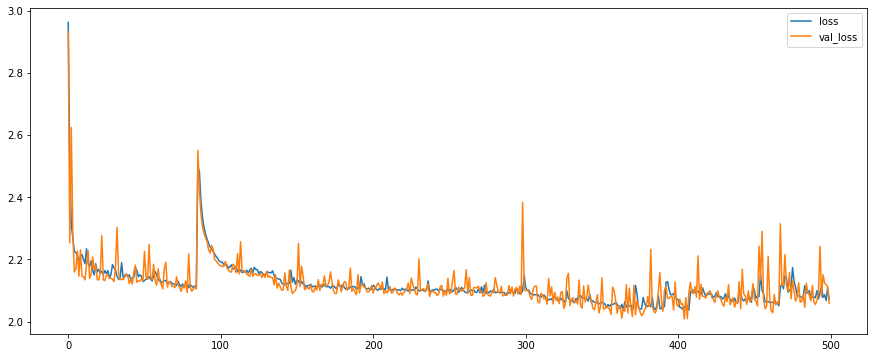

In [38]:
# Compare the loss & val_loss on a graph
losses = pd.DataFrame(NN_model.history.history)
title  = 'Loss vs Validation Loss'
losses[['loss','val_loss']].plot(figsize=(15,6))

In [39]:
predictions = NN_model.predict(X_test)

In [40]:
print('--- Evalutaion Matrix of NN ---')
print('Mean Absolute Error      - ', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error       - ', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error  - ' ,np.sqrt(metrics.mean_squared_error(y_test,predictions))) 

--- Evalutaion Matrix of NN ---
Mean Absolute Error      -  2.03729940850645
Mean Squared Error       -  27.04155180331692
Root Mean Squared Error  -  5.200149209716671


Comparison of Predicted Data & Test Data

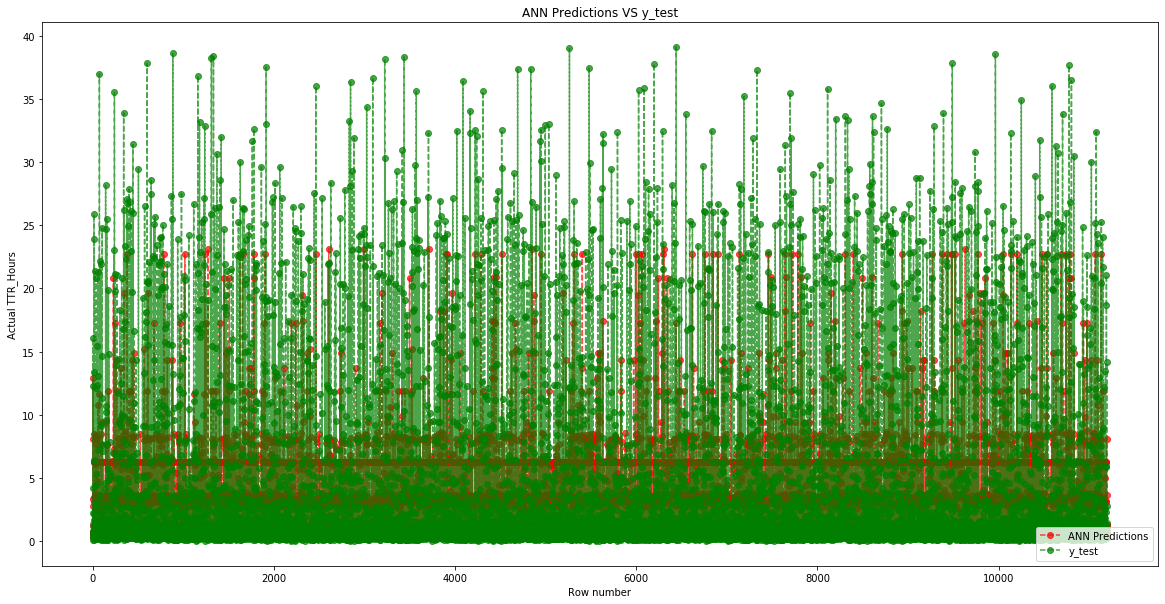

In [41]:
x_axis             = np.array(range(0, predictions.shape[0]))
plt.figure(figsize = (20,10))
plt.plot(x_axis, predictions, linestyle = "--", marker="o", alpha=0.7, color='r', label="ANN Predictions")
plt.plot(x_axis, y_test, linestyle = "--", marker="o", alpha=0.7, color='g', label="y_test")
plt.xlabel('Row number')
plt.ylabel('Actual TTR_Hours')
plt.title('ANN Predictions VS y_test')
plt.legend(loc='lower right')

# END